Project 3: Gender Classification of Names

The goal of this project was to build and improve a classifier that predicts the gender associated with first names using NLTK’s Names Corpus.

The Names Corpus from NLTK contains approximately 8,000 labeled male and female first names.

I randomized the data and divided it into three subsets:
- Training set: 6,900 names
- Development-test set: 500 names
- Final test set: 500 names


I began with a simple feature extractor using the last letter of each name, which yielded around 75 % accuracy.

To improve performance, I designed an advanced feature set including:
- first_letter and last_two letters
- name_length
- vowel_count and ends_with_vowel
- count(a/e/i/o/u) for detailed vowel patterns

These features capture both structural and phonetic cues that often correlate with gender (e.g., female names ending in -a or -ie; male names ending in -n or -rd).


In [7]:
import random
import nltk
from nltk.corpus import names
from nltk import classify, NaiveBayesClassifier, DecisionTreeClassifier, MaxentClassifier


nltk.download('names')

# Load the dataset correctly (each item is a string)
labeled_names = ([(name, 'male') for name in names.words('male.txt')] +
                 [(name, 'female') for name in names.words('female.txt')])

random.shuffle(labeled_names)

# Split the data
test_set = labeled_names[:500]
devtest_set = labeled_names[500:1000]
train_set = labeled_names[1000:]

# Feature extractor
def gender_features_advanced(name):
    name = name.lower()
    features = {
        'first_letter': name[0],
        'last_letter': name[-1],
        'last_two': name[-2:],
        'name_length': len(name),
        'vowel_count': sum(1 for c in name if c in 'aeiou'),
        'ends_with_vowel': (name[-1] in 'aeiou'),
    }
    for vowel in 'aeiou':
        features[f'count({vowel})'] = name.count(vowel)
    return features

# Create feature sets
train_features = [(gender_features_advanced(n), g) for (n, g) in train_set]
devtest_features = [(gender_features_advanced(n), g) for (n, g) in devtest_set]
test_features = [(gender_features_advanced(n), g) for (n, g) in test_set]


[nltk_data] Downloading package names to
[nltk_data]     /Users/leslietavarez/nltk_data...
[nltk_data]   Package names is already up-to-date!


During training, the Maximum Entropy classifier kept improving with each iteration. The log-likelihood went from about −0.69 in the first round to around −0.33 by the tenth, and the training accuracy increased from about 37% to 81%. After around eight iterations, the accuracy stopped changing much, which showed that the model had basically learned all it could and adding more iterations wouldn’t make a big difference.

In [8]:
# Train classifiers
nb_classifier = NaiveBayesClassifier.train(train_features)
dt_classifier = DecisionTreeClassifier.train(train_features)
me_classifier = MaxentClassifier.train(train_features, max_iter=10)

  ==> Training (10 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.373
             2          -0.51120        0.697
             3          -0.44998        0.793
             4          -0.41244        0.801
             5          -0.38784        0.805
             6          -0.37069        0.804
             7          -0.35810        0.806
             8          -0.34850        0.810
             9          -0.34093        0.809
         Final          -0.33482        0.810


In [18]:
from nltk import classify

def evaluate_model(classifier, name):
    dev_acc = classify.accuracy(classifier, devtest_features)
    test_acc = classify.accuracy(classifier, test_features)
    print(f" {name} Classifier:")
    print(f"   Dev-Test Accuracy: {dev_acc:.3f}")
    print(f"   Test Accuracy:     {test_acc:.3f}")
    return dev_acc, test_acc

nb_results = evaluate_model(nb_classifier, "Naive Bayes")
dt_results = evaluate_model(dt_classifier, "Decision Tree")
me_results = evaluate_model(me_classifier, "Maximum Entropy")

print("\nMost Informative Features (Naive Bayes):")
nb_classifier.show_most_informative_features(10)

 Naive Bayes Classifier:
   Dev-Test Accuracy: 0.760
   Test Accuracy:     0.784
 Decision Tree Classifier:
   Dev-Test Accuracy: 0.730
   Test Accuracy:     0.782
 Maximum Entropy Classifier:
   Dev-Test Accuracy: 0.804
   Test Accuracy:     0.810

Most Informative Features (Naive Bayes):
Most Informative Features
                last_two = 'na'           female : male   =     94.9 : 1.0
                last_two = 'la'           female : male   =     73.1 : 1.0
                last_two = 'ia'           female : male   =     50.9 : 1.0
             last_letter = 'a'            female : male   =     35.9 : 1.0
                last_two = 'sa'           female : male   =     31.8 : 1.0
             last_letter = 'k'              male : female =     29.9 : 1.0
                last_two = 'us'             male : female =     29.4 : 1.0
                last_two = 'ra'           female : male   =     25.3 : 1.0
                last_two = 'do'             male : female =     23.6 : 1.0
        

The three classifiers all performed well, but the Maximum Entropy model achieved the highest overall accuracy. The Naive Bayes classifier reached about 76% on the dev-test set and 78% on the test set, while the Decision Tree was slightly lower on the dev-test (73%) but caught up on the test (78%). The Maximum Entropy classifier performed best, with around 80% accuracy on the dev-test and 81% on the test set, showing the strongest generalization.

The Naive Bayes model’s most informative features showed clear linguistic patterns: names ending in “-na,” “-la,” “-ia,” and “-a” were strongly associated with female names, while endings like “-k,” “-us,” and “-do” were linked to male names. These results make sense linguistically and show that the classifier successfully learned patterns in name endings related to gender.

In [19]:
# Predict gender for some unique and modern names

unique_names = [
    "Skylar", "Phoenix", "Avery", "Zion", "Riley",
    "Kai", "Artemis", "Brixton", "Sanaa", "Jasper",
    "Indigo", "Mika", "Zephyr", "Juniper", "Elio",
    "Harper", "Luca", "Priya", "Kendrix", "Amari",
    "Noor", "Sage", "Orion", "Azura", "Leif"
]

print("\n Predictions for Unique and Modern Names\n")
print(f"{'Name':<12} {'Naive Bayes':<10} {'MaxEnt':<10}")
print("-" * 34)

for name in unique_names:
    nb_pred = nb_classifier.classify(gender_features_advanced(name))
    me_pred = me_classifier.classify(gender_features_advanced(name))
    print(f"{name:<12} {nb_pred:<10} {me_pred:<10}")



 Predictions for Unique and Modern Names

Name         Naive Bayes MaxEnt    
----------------------------------
Skylar       male       male      
Phoenix      male       female    
Avery        male       female    
Zion         male       male      
Riley        male       female    
Kai          female     female    
Artemis      male       female    
Brixton      male       male      
Sanaa        female     female    
Jasper       male       male      
Indigo       male       male      
Mika         female     female    
Zephyr       male       male      
Juniper      male       male      
Elio         male       male      
Harper       male       male      
Luca         female     female    
Priya        female     female    
Kendrix      male       female    
Amari        female     female    
Noor         male       male      
Sage         female     male      
Orion        male       male      
Azura        female     female    
Leif         male       male      


When I tested the classifiers on unique and modern names, their predictions were more mixed compared to traditional names. The Naive Bayes model tended to predict “male” more often, while the Maximum Entropy classifier was a bit more balanced and sometimes flipped names to “female” that Naive Bayes had labeled “male.”

Both models agreed on some cases, for example, Jasper, Zephyr, and Leif were predicted as male by both, while Sanaa, Priya, and Amari were predicted as female by both. However, several names such as Phoenix, Avery, and Riley showed disagreement between the two models, which makes sense because these are genuinely gender-neutral or modern names that don’t follow traditional spelling patterns.

Overall, the test showed that while both classifiers perform well on familiar name structures, they are less reliable for newer or unisex names, highlighting how training data that’s mostly older and English-based limits generalization to more diverse naming conventions.

I combined my Naive Bayes and Maximum Entropy classifiers into one prediction function. This function compares the outputs of both models and looks at how confident each one is. 

If the two classifiers disagree or are both below a 65% confidence threshold, the program labels the name as “neutral” instead of forcing it into male or female.

This helped handle ambiguous or modern names like Avery, Riley, and Phoenix, which don’t follow clear traditional gender patterns. It also made the system more realistic, since real-world name gender prediction often includes uncertainty.


In [20]:
def smart_predict(name, threshold=0.65):
    """Combine Naive Bayes + MaxEnt predictions with confidence threshold."""
    features = gender_features_advanced(name)
    
    # Get probability distributions from both classifiers
    nb_probs = nb_classifier.prob_classify(features)
    me_probs = me_classifier.prob_classify(features)
    
    # Extract predicted labels and confidence
    nb_label = nb_probs.max()
    me_label = me_probs.max()
    nb_conf = nb_probs.prob(nb_label)
    me_conf = me_probs.prob(me_label)
    
    # If classifiers disagree OR both low confidence = Neutral
    if nb_label != me_label or (nb_conf < threshold and me_conf < threshold):
        return "neutral", round((nb_conf + me_conf) / 2, 2)
    else:
        # Return the agreed label and average confidence
        return nb_label, round((nb_conf + me_conf) / 2, 2)
    
test_names = [
    "Avery", "Taylor", "Jordan", "Riley", "Alex",
    "Phoenix", "Sage", "Harper", "Kai", "Noor",
    "Emerson", "Rowan", "Skyler", "Finley", "Charlie",
    "Maria", "John", "Luna", "Ethan", "Amari"
]

print(f"{'Name':<12} {'Prediction':<12} {'Confidence':<10}")
print("-" * 36)

for name in test_names:
    label, conf = smart_predict(name)
    print(f"{name:<12} {label:<12} {conf:<10}")

Name         Prediction   Confidence
------------------------------------
Avery        neutral      0.65      
Taylor       male         0.92      
Jordan       male         0.8       
Riley        neutral      0.67      
Alex         male         0.81      
Phoenix      neutral      0.66      
Sage         neutral      0.56      
Harper       male         0.92      
Kai          female       0.74      
Noor         male         0.93      
Emerson      male         0.82      
Rowan        male         0.82      
Skyler       male         0.91      
Finley       neutral      0.67      
Charlie      female       0.89      
Maria        female       0.99      
John         male         0.83      
Luna         female       0.99      
Ethan        male         0.76      
Amari        female       0.93      


Even with this improvement, there are still some names that don’t match what I would expect based on real-world usage. For example, Kai was predicted as female even though I’ve mostly seen it used for males, and Alex and Taylor were labeled as male even though I know many females with those names. This shows one of the main disadvantages of the model — it learns from patterns in the training data, which comes mostly from older, English-based names, so it doesn’t always reflect how names are actually used today across different cultures or generations. In other words, the model performs well statistically but can still make predictions that don’t align with social or cultural realities.

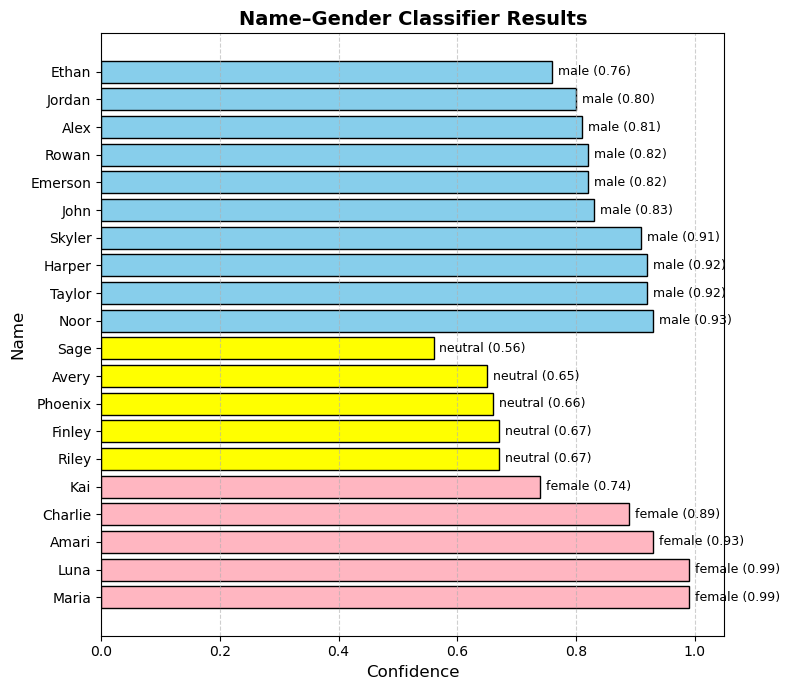

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

test_names = [
    "Avery", "Taylor", "Jordan", "Riley", "Alex",
    "Phoenix", "Sage", "Harper", "Kai", "Noor",
    "Emerson", "Rowan", "Skyler", "Finley", "Charlie",
    "Maria", "John", "Luna", "Ethan", "Amari"
]

results = []
for name in test_names:
    label, conf = smart_predict(name)
    results.append({"Name": name, "Prediction": label, "Confidence": conf})

# Create DataFrame and sort by Prediction, then by Confidence
df = pd.DataFrame(results)
category_order = {"female": 0, "neutral": 1, "male": 2}
df["CategoryOrder"] = df["Prediction"].map(category_order)
df = df.sort_values(by=["CategoryOrder", "Confidence"], ascending=[True, False])

# Assign colors
color_map = {"male": "skyblue", "female": "lightpink", "neutral": "yellow"}
df["Color"] = df["Prediction"].map(color_map)

# Plot
plt.figure(figsize=(8, 7))
bars = plt.barh(df["Name"], df["Confidence"], color=df["Color"], edgecolor="black")

# Add labels next to each bar
for i, (conf, label) in enumerate(zip(df["Confidence"], df["Prediction"])):
    plt.text(conf + 0.01, i, f"{label} ({conf:.2f})", va='center', fontsize=9)

# Chart aesthetics
plt.xlim(0, 1.05)
plt.title("Name–Gender Classifier Results", fontsize=14, weight='bold')
plt.xlabel("Confidence", fontsize=12)
plt.ylabel("Name", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()